In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## nibabel - testing library

In [2]:
import nibabel as nib

In [3]:
pwd

'C:\\data\\graduate_thesis\\project'

In [4]:
img1 = nib.load('../hcp_data/100307/MNINonLinear/Results/tfMRI_SOCIAL_LR/tfMRI_SOCIAL_LR.nii.gz')
img_data = img1.get_data()

In [71]:
# array_data = np.array(img_data)
# len(array_data[0])

In [18]:
print(img1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  91 109  91 274   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.          2.          2.          2.          0.72000003  0.          0.
  0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_

In [5]:
print(img1.header.get_data_shape())

(91, 109, 91, 274)


In [6]:
img1.header['dim']

array([  4,  91, 109,  91, 274,   1,   1,   1], dtype=int16)

In [7]:
print(img1.affine)

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


In [51]:
nib.aff2axcodes(img1.affine)

('L', 'A', 'S')

In [20]:
print(img1.header.get_zooms())

(2.0, 2.0, 2.0, 0.72000003)


In [21]:
nib.is_proxy(img1.dataobj)

True

In [8]:
nib.is_proxy(img_data)

False

In [9]:
img1.dataobj

In [10]:
list(img1.file_map)

['image']

In [23]:
# nib.save(array_img, 'my_image.nii')
# img_again = nib.load('my_image.nii')

---

In [11]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [12]:
n_i, n_j, n_k, n_t = img_data.shape

In [13]:
print(n_i, n_j, n_k, n_t)

91 109 91 274


    Центральный воксель

In [14]:
center_i = int((n_i - 1) / 2.)
center_j = int((n_j - 1) / 2.)
center_k = int((n_k - 1) / 2.)
print(center_i, center_j, center_k)


45 54 45


    в момент времени 0

In [46]:
center_vox_value_t1 = img_data[center_i, center_j, center_k, 0]
print(center_vox_value_t1)

9955.84


    в момент времени 50

In [47]:
center_vox_value_t2 = img1.dataobj[center_i, center_j, center_k, 50]
print(center_vox_value_t2)

10035.3


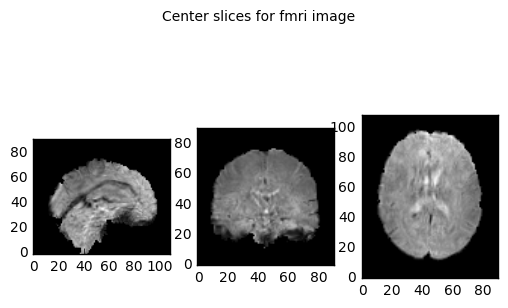

In [48]:
slice_0 = img_data[center_i, :, :, 0]
slice_1 = img_data[:, center_j, :, 0]
slice_2 = img_data[:, :, center_k, 0]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for fmri image")

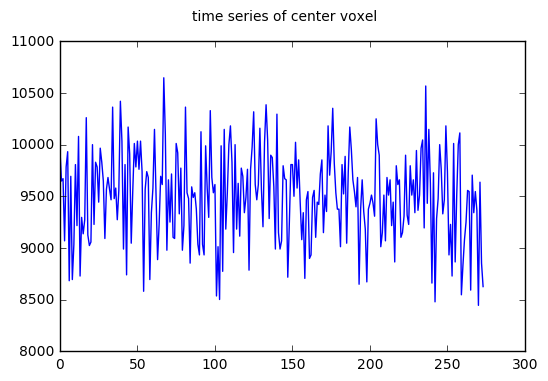

In [15]:
line1 = plt.plot(img_data[center_i, center_j, center_k, :])
plt.suptitle("time series of center voxel")
plt.show()

### маска (из папки)

In [55]:
img_mask1 = nib.load('../hcp_data/100307/MNINonLinear/Results/tfMRI_SOCIAL_LR/brainmask_fs.2.nii.gz')
img_mask1_data = img_mask1.get_data()


In [58]:
img_mask1_data.shape

(91, 109, 91)

In [62]:
mask_indices = list(zip(*np.where(img_mask1_data)))

In [63]:
len(mask_indices)

229404

In [64]:
n_i * n_j * n_k

902629

## загрузка нескольких nifti файлов

    C:/data/graduate_thesis/hcp

In [16]:
import os

list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\data\graduate_thesis\hcp'):
#     print(dirpath, dirnames, filenames)
    for filename in filenames:        
        if filename.endswith('tfMRI_SOCIAL_LR.nii.gz'): 
            list_of_files.append(os.sep.join([dirpath, filename]))

In [17]:
list_of_files

['C:\\data\\graduate_thesis\\hcp\\100307_3T_tfMRI_SOCIAL_preproc\\100307\\MNINonLinear\\Results\\tfMRI_SOCIAL_LR\\tfMRI_SOCIAL_LR.nii.gz',
 'C:\\data\\graduate_thesis\\hcp\\103414_3T_tfMRI_SOCIAL_preproc\\103414\\MNINonLinear\\Results\\tfMRI_SOCIAL_LR\\tfMRI_SOCIAL_LR.nii.gz',
 'C:\\data\\graduate_thesis\\hcp\\105115_3T_tfMRI_SOCIAL_preproc\\105115\\MNINonLinear\\Results\\tfMRI_SOCIAL_LR\\tfMRI_SOCIAL_LR.nii.gz']

In [51]:
for file_path in list_of_files:
    img = nib.load(file_path)
    n_i, n_j, n_k, n_t = img.header.get_data_shape()
    center_i = int((n_i - 1) / 2.)
    center_j = int((n_j - 1) / 2.)
    center_k = int((n_k - 1) / 2.)
    print(center_i, center_j, center_k)
    center_vox_value_t1 = img.get_data()[center_i, center_j, center_k, 0]
    print(center_vox_value_t1)
    

45 54 45
9955.84
45 54 45
10184.2
45 54 45
12749.7


### nilearn

In [18]:
import nilearn as nl

In [21]:
# from nilearn.masking import compute_epi_mask
# # Visualize it as an ROI
# from nilearn.plotting import plot_roi


# for file_path in list_of_files:
#     img = nib.load(file_path)
#     img_data = img.get_data()
#     mask_img = compute_epi_mask(file_path)
#     plot_roi(mask_img, img_data)
    
# plt.show()